In [ ]:
# Building A Logistic Regression in Python, Step by Step
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('bank.csv', header=0)
data = data.dropna()
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0.0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3.0,6.0,2.0,success,-1.7,94.055,-39.8,0.729,4991.6,1.0
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0.0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1.0,3.0,1.0,success,-2.9,92.201,-31.4,0.869,5076.2,1.0


In [3]:
print(data.shape)
print(data.columns.values)

(18928, 21)
['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp_var_rate' 'cons_price_idx' 'cons_conf_idx' 'euribor3m' 'nr_employed'
 'y']


In [4]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [5]:
# group 'basic.4y', 'basic.6y', 'basic.9y' as 'basic'
data['education'] = np.where(data['education'] == 'basic.4y', 'basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.9y', 'basic', data['education'])

In [6]:
data['education'].unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [7]:
# y — has the client subscribed a term deposit? 
data['y'].value_counts()

0.0    16757
1.0     2171
Name: y, dtype: int64

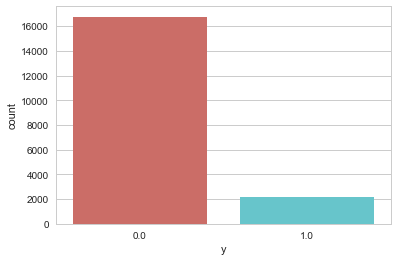

In [8]:
sns.countplot(x='y', data=data, palette='hls')

In [9]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0.0,39.848183,220.276183,2.624754,985.083607,0.133914,0.243104,93.604768,-40.563251,3.802752,5175.667220
1.0,40.851681,553.129894,2.030861,787.198526,0.504376,-1.230309,93.374348,-39.974620,2.107931,5093.995256


In [10]:
data.groupby(['y', 'education']).mean()

age    duration  campaign       pdays  \
y   education                                                          
0.0 basic                41.670535  226.230930  2.599011  988.242914   
    high.school          37.893164  221.224331  2.602547  986.360021   
    illiterate           47.000000  126.125000  2.125000  999.000000   
    professional.course  40.083140  219.052485  2.642824  983.790989   
    university.degree    38.867442  211.966964  2.637025  981.260544   
    unknown              42.938144  232.689249  2.811487  984.425626   
1.0 basic                47.183236  628.982456  2.013645  836.267057   
    high.school          37.237792  598.354565  2.031847  792.558386   
    illiterate           51.000000  838.000000  3.000000  999.000000   
    professional.course  40.498339  544.418605  2.043189  791.259136   
    university.degree    38.500000  488.048969  2.048969  760.864691   
    unknown              44.293578  485.486239  1.935780  707.422018   

                         previous  emp_var_rate  cons_price_idx  \
y   education                                                     
0.0 basic                0.119460      0.277801       93.660467   
    high.school          0.148427      0.200624       93.617601   
    illiterate           0.125000      0.225000       93.445750   
    professional.course  0.112866      0.400557       93.606654   
    university.degree    0.145439      0.153916       93.516023   
    unknown              0.148748      0.348306       93.725781   
1.0 basic                0.407407     -0.992982       93.407895   
    high.school          0.475584     -1.217622       93.364257   
    illiterate           0.000000     -1.800000       93.075000   
    professional.course  0.468439     -1.186711       93.391030   
    university.degree    0.563144     -1.381057       93.343707   
    unknown              0.770642     -1.444037       93.434881   

                         cons_conf_idx  euribor3m  nr_employed  
y   education                                                   
0.0 basic                   -40.953719   3.830716  5176.635096  
    high.school             -41.010086   3.742054  5173.597738  
    illiterate              -42.687500   3.832250  5187.775000  
    professional.course     -40.076173   3.963944  5182.310683  
    university.degree       -40.057158   3.736795  5173.488947  
    unknown                 -40.115317   3.886215  5174.131075  
1.0 basic                   -40.302729   2.398234  5110.141715  
    high.school             -40.069002   2.127654  5095.696391  
    illiterate              -47.100000   1.410000  5099.100000  
    professional.course     -40.157807   2.136684  5093.593688  
    university.degree       -39.733892   1.944482  5085.543428  
    unknown                 -39.165138   1.747055  5071.885321

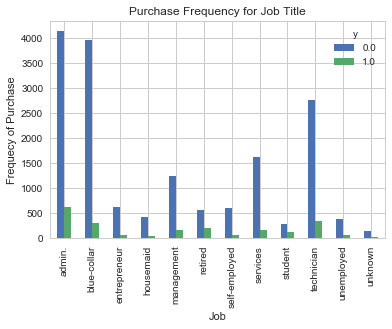

In [11]:
%matplotlib inline
pd.crosstab(data.job, data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequecy of Purchase')
plt.show()

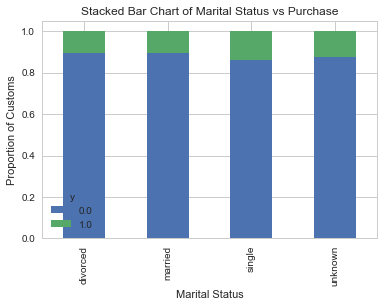

In [12]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customs')
plt.show()

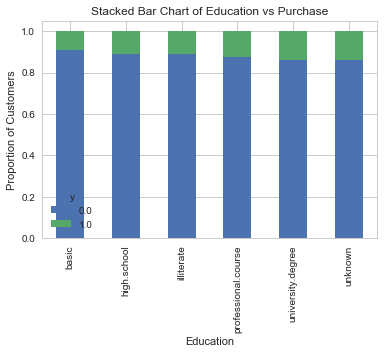

In [13]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.show()

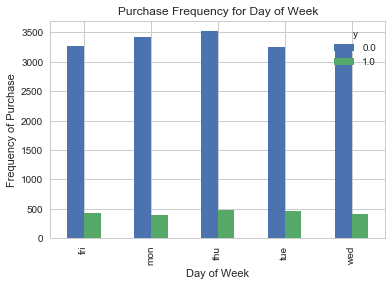

In [14]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.show()

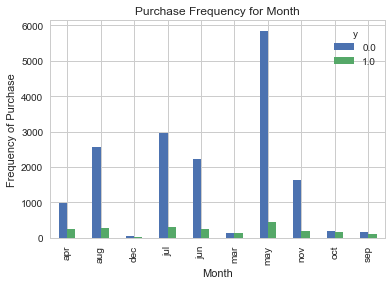

In [15]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.show()

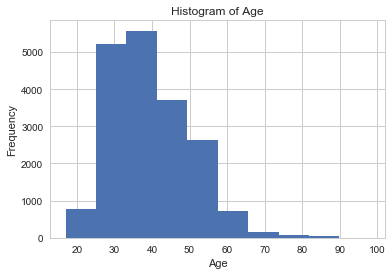

In [16]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

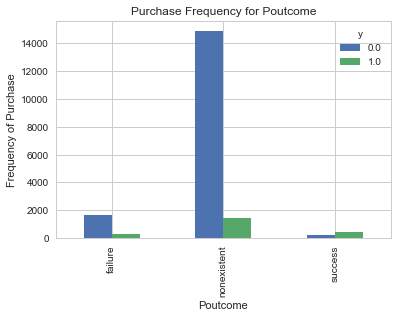

In [17]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.show()

In [18]:
# create dummy variables
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
           'month', 'day_of_week', 'poutcome']
for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1 = data.join(cat_list)
    data = data1
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

data_final = data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [19]:
data_final_vars = data_final.columns.values.tolist()
y = ['y']
X = [i for i in data_final_vars if i not in y]

In [20]:
# select feature using RFE(Recursive Feature Elimination)
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y])
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False  True  True False False False False False False
 False False False  True  True False  True False False False False False
 False False  True False False False False False  True  True False False
 False False False False False  True  True False False False  True  True
  True  True False False False False  True False False False  True  True
  True]
[27 24 18 39  1  1 12 13 23 16  4  7 30 19 40  1  1  9  1 26 38 34  3 10
 11 36  1  2 42  5 22 25  1  1 44  8 43 28 29 41 17  1  1 33  6 31  1  1
  1  1 35 21 32 20  1 15 14 37  1  1  1]


In [21]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
X=data_final[cols]
y=data_final['y']

In [22]:
import statsmodels.api as sm
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.290502
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                18928
Model:                          Logit   Df Residuals:                    18910
Method:                           MLE   Df Model:                           17
Date:                Sat, 26 May 2018   Pseudo R-squ.:                  0.1845
Time:                        16:31:13   Log-Likelihood:                -5498.6
converged:                       True   LL-Null:                       -6742.6
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                 0.2376      0.075      3.171      0.002       0.091       0.384

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn import metrics
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
y_pred = logreg.predict(X_test)
print('Accuracy of logit regression classfier on test set: %.2f' % logreg.score(X_test, y_test))

Accuracy of logit regression classfier on test set: 0.90


In [25]:
from sklearn import  model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
results = cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring='accuracy')
print('10-fold cross validation average accuracy: %.3f' % results.mean())


10-fold cross validation average accuracy: 0.895


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[5001   59]
 [ 508  111]]


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.91      0.99      0.95      5060
        1.0       0.65      0.18      0.28       619

avg / total       0.88      0.90      0.87      5679



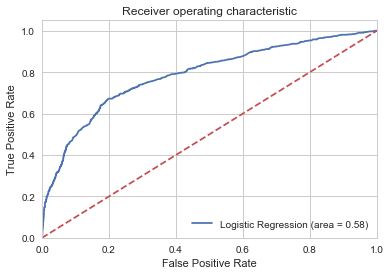

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()